In [16]:
#Load the IMDB dataset
from keras.datasets import imdb

(train_data,train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)  

In [17]:
#shape of your data
train_data.shape #(25000,)
train_labels.shape #(25000,)
test_data.shape #(25000,)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [18]:
max_list=[max(sequence) for sequence in train_data]

max(max_list)

9999

In [19]:
word_index=imdb.get_word_index()

reverse_word_index= dict([(value, key) for (key,value) in word_index.items()])

decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [20]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [21]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.  #what if repeat vocab in one review? it doesnt matter?
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)


y_train=np.asarray(train_labels)
y_test=np.asarray(test_labels)

In [22]:
x_train.shape #(25000, 10000)
#tensor x_train have 25000個moive review, each review have 10000 integer

(25000, 10000)

In [23]:
#define the model layer
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [25]:
#compile model
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

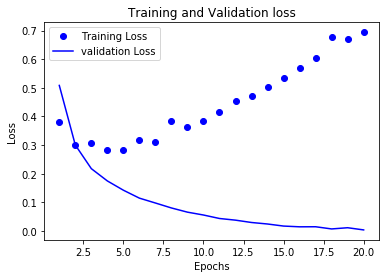

In [26]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
history_dict.keys()
epochs= range(1,len(loss_values)+1)
plt.plot(epochs, val_loss_values, 'bo', label='Training Loss')
plt.plot(epochs, loss_values, 'b', label='validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

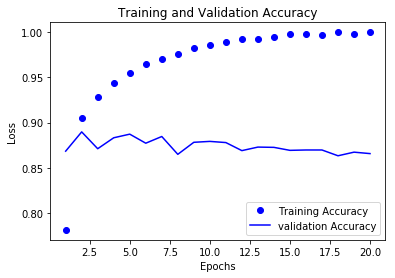

In [27]:
import matplotlib.pyplot as plt

history_dict=history.history
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
history_dict.keys()
epochs= range(1,len(acc_values)+1)
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
result= model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 102us/step


In [29]:
result

[0.7696778268504143, 0.84956]

In [30]:
model.predict(x_test)

array([[0.00523746],
       [0.9999999 ],
       [0.91089684],
       ...,
       [0.00158396],
       [0.00556901],
       [0.46071905]], dtype=float32)